# 요구사항 분석(기획)


- 연구 목표 설정
- 주제 선정, 시장 분석, 데이터 체크, 타깃 선정 ...
- 최종 산출물 기반으로 진행

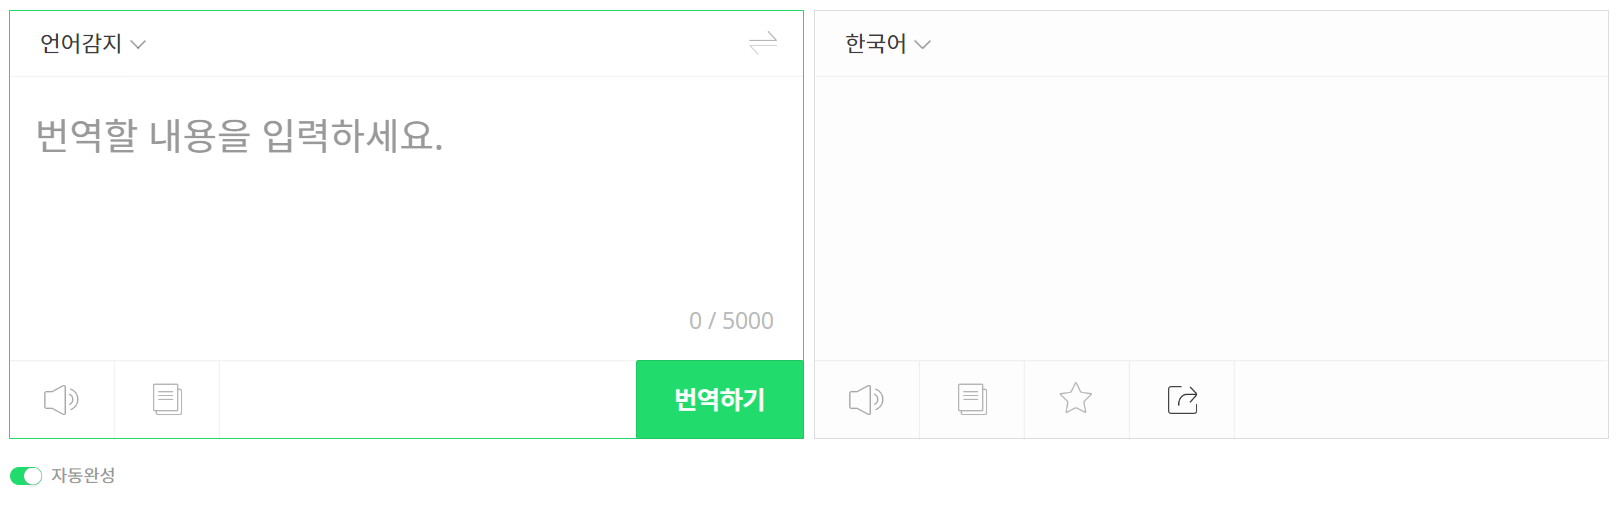

In [3]:
# 파이썬은 파이썬 파일(*.py) or 패키지(디렉토리)로 구성
from IPython.display import Image

Image('/content/drive/MyDrive/bigDataClass/deeplearning/day1/res/project_goal.png')
# 최조 산출물의 결과 예시

## 머신러인 / 딥러닝 사용할 데이터

- 대량의 말뭉치
- 같은 내용을 각국 언어별로 표현하는 것 가장 이상적 (제품 설명서, 소설, 법문, 국제 뉴스(?), 위키피디아)
- 절차적으로는 위키피디아에서 수집행위를 수행, 시간 관계상 데이터 제공
- 국가별 언어들의 문자의 사용 빈도는 다르다(주장, 근거)
  - 그 빈도를 알고리즘/인공신경망(머신러닝/딥러닝)에게 학습시켜서 이를 구분 할 수 있게 모델을 준비한다
  - 인코딩
    - utf8:완성형(8bit/1byte), euc-kr:조합형(16bit/2byte), ascii,..

#### review check

In [ ]:
# 8bit 양의정수 : 0 ~ 255 (2^8-1)
# 16bit 양의 정수 : 0 ~ 65535 (2^16-1)

In [51]:
ord('a'),ord('b')
# 모든 문자를 표현하는 수치값이 서로 다르다
# 각 수치가 반복되는 빈도 (말뭉치상에서) 다르다 -> 이 차이점을 학습시킨다

(97, 98)

# 데이터 수집/확보

## 데이터 수집 행위를 렙벨로 정리

- level 1
  - 공공/기업내 등등 제공받는 데이터
- level 2 : open api 활용
  - naver / kakao / ... request => response
  - 이를 통해서 제공 받는 정형 데이터
- level 3 : web scrapping
  - bs4 (beautifulSoup)
  - 사이트에 접속만 하면 바로 확득 가능한 수준
  - 백그라운드 처리 가능
- level 4 : crawling
  - selenium + webdriver (drowser bander)
  - 원하는 정보까지 도착하기 위해 ajax기술이 적용 되거나 인증 행위가 진행 => 사람이 개입 해야하는 상황

- 추가 인사이트
  - html, css, javascript : 웹서비스의 프런트 담당 정보를 알면 유리
  - css의 selector 이해
  - 툴에서 해결 가능함

## 위키피디아에서 데이터 획득

- https://en.wikipedia.org/wiki/Tesla,_Inc.
- 해당 사이트 분석 -> 데이터는 사이트에 접속하면 바로 획득 가능 -> level 3 적용 (web scripping)

In [ ]:
!pip3 freeze

In [10]:
# 2-1. 모듈 가져오기
from bs4 import BeautifulSoup
import urllib.request as req

In [14]:
# 2-2. 데이터 획득 (요청을 통해)
res = req.urlopen('https://en.wikipedia.org/wiki/Tesla,_Inc.')

res

In [15]:
# 2-3. 결과를 뽑아서(html) 파싱 수행 -> DOM(documments object model) 트리 생성(문서 객체 모델로 메모리에 로드됨)
soup = BeautifulSoup(res,'html5lib')

In [23]:
# 2-4. 탐색및 데이터 추출 : tesla에 대한 설명문
#      사이트에서 css selector를 활용하여 데이터 타겟을 특정한다
#      => #mw-content-text p
tmps = soup.select('#mw-content-text p')
type(tmps),len(tmps)

(list, 184)

In [24]:
# 1개의 데이터 확인
# 데이터 정제는 데이터 준비 과정에서 진행
tmps[1].text.strip()

"Tesla, Inc. (/ˈtɛslə/ TESS-lə[b]) is an American multinational automotive and clean energy company headquartered in Austin, Texas. Tesla designs and manufactures electric vehicles (electric cars and trucks), battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services. Tesla is one of the world's most valuable companies and remains the world's most valuable automaker with a market capitalization of more than US$760\xa0billion. The company had the most worldwide sales of battery electric vehicles and plug-in electric vehicles, capturing 21% of the battery-electric (purely electric) market and 14% of the plug-in market (which includes plug-in hybrids) in 2021. Through its subsidiary Tesla Energy, the company develops and is a major installer of photovoltaic systems in the United States. Tesla Energy is also one of the largest global suppliers of battery energy storage systems, with 3.99 gigawatt-hours (GWh) installed in 2021."

In [33]:
# 2-5. 추출된 말뭉치에서 텍스트만 뽑아서 좌우 공백 제거하고 리스트에 저장
#      for 문 사용 -> 데이터가 184개로 명확하게 끝이 나와 있었기 때문

texts = list()

# for idx,tmp in enumerate(tmps):
for tmp in tmps:
  texts.append(tmp.text.strip())
  # if idx==1:
  #   break

len(texts),texts[100]

(184,
 'Tesla acquired a former JC Penney distribution center near Lathrop, California in 2021 to build a Megafactory to manufacture Megapacks.[332] The location opened in 2022 and produces the next-generation Megapacks to use prismatic lithium iron phosphate batteries.[333]')

In [57]:
# 2-5. 1줄로 표현 하시오
#      리스트 내포
texts2 = [ tmp.text.strip() for tmp in tmps ]
len(texts2)

184

In [58]:
# 2-6. 문자열을 맴버로 가진 리스트(text2)를 한개의 문자열(data)로 통합

data = ''.join(texts2)
len(data)

82653

In [59]:
# 2-7. [ { "data":"말뭉치","label":"en" } ] 이런 형식으로 train.json 파일 생성및 저장
import json

with open('train.json','w') as t:
  json.dump([ { "data":data,"label":"en" } ],t)

### tip

In [37]:
import json
# 2-6. 파일 형태로 제공
# with문 I/O 작업 할 때 사용, 자동 close를 수행하는 코드, 닫기 수행을 구현하지 않는 개발자들이 발생하는 버그를 잡아준다
f = open('low_text.json','w')
json.dump({1:1},f)
f.close()

# 위의 코드와 같은내용 
# with문이 종료되면 자동으로 닫힌다
# 파일 / db / 네트워크 등등 다 해당
with open('low_text.json','w') as f:
  json.dump({1:1},f)

## 제공된 데이터에서 획득

# 데이터 준비/전처리

- 목표
  - 말뭉치속에 있는 잡음 제거(클린 작업)
    - 알파벳이 아닌 문자 제거
    - 전략 : 파이썬의 정규식 활용
  - 알파벳(a-z)의 등장 빈도 카운트
    - 전략 : 카운트, 반복, 로직
  - 정답 추출(en, ko, jp, id, tl, fr, ...)
    - 주어진 데이터 기준으로 추출
    - 전략 : 파일명에서 추출
  - 데이터가 불균형 하다면 정규화 고민
    - 값의 분산에 대한 불균형
      - 지분율로 처리/전체 대비 비중/%
        - softmax()
      - 전략 : 식 -> 개별문자빈도/전체빈도
    - 분포, 정답의 비율(en 30개, fr 10개)
- 입력
  - train/*.txt
  - test/*.txt
- 출력
  - trains.json
  - test.json

- 이상치, 결측치 처리
- **데이터의 품질을 향상**
- 정제, 뒤에서 사용하기에 맞는 형태로 변형
  - 데이터 > 수치화, 원-핫인코딩, ...

## 데이터 클린 작업

- 말뭉치속에 있는 잡음 제거(클린 작업)
    - 알파벳이 아닌 문자 제거
    - 전략 : 파이썬의 정규식 
    - 위에서 작업한 말뭉치를 활용

In [54]:
# 3-1-1. 정규식 모듈 가져오기
import re

In [85]:
# 3-1-2. 정규식 생성
# [a-zA-Z] : 문자 1개
# + : 1 ~ 무한대
# * : 1 ~ 무한대
# [^문자] : 해당 문자를 제외하고
pattern =  '[^a-zA-Z]+' # '[^a-zA-Z]+'
# 제거 대상 : 한글, 숫자, 특수문자, ...
p = re.compile(pattern)

In [ ]:
# 3-1-3. 정규식을 적용하여 알파벳만 남아있는 low(가공된) 데이터 획득
tmp = p.sub('',data).lower() # 정규식 후 소문자로 후처리
tmp

In [84]:
# 3-1-4. 해댱모듈 함수화 처리
import re

def clearnData(src):
  '''
  잡음이 많은 말 뭉치를 받아서 알파벳을 제외한 모든 문자를 제거후 반환하는 함수
  src : 원재료 말뭉치
  return : 순수한 소문자 알파벳 말뭉치
  '''
  p = re.compile('[^a-zA-Z]+')
  return p.sub('',src).lower()

clearnData(data)

'teslainctsltesslbisanamericanmultinationalautomotiveandcleanenergycompanyheadquarteredinaustintexastesladesignsandmanufactureselectricvehicleselectriccarsandtrucksbatteryenergystoragefromhometogridscalesolarpanelsandsolarrooftilesandrelatedproductsandservicesteslaisoneoftheworldsmostvaluablecompaniesandremainstheworldsmostvaluableautomakerwithamarketcapitalizationofmorethanusbillionthecompanyhadthemostworldwidesalesofbatteryelectricvehiclesandpluginelectricvehiclescapturingofthebatteryelectricpurelyelectricmarketandofthepluginmarketwhichincludespluginhybridsinthroughitssubsidiaryteslaenergythecompanydevelopsandisamajorinstallerofphotovoltaicsystemsintheunitedstatesteslaenergyisalsooneofthelargestglobalsuppliersofbatteryenergystoragesystemswithgigawatthoursgwhinstalledinteslawasincorporatedinjulybymartineberhardandmarctarpenningasteslamotorsthecompanysnameisatributetoinventorandelectricalengineernikolateslainfebruaryviaamillioninvestmentelonmuskbecamethelargestshareholderofthecompanyhe

## 빈도계산

- 알파벳 (a-z)의 등장 빈도 카운트
  - 전략 : 카운트, 반복, 로직
  - 데이터가 알파벳만 존재함
    - a~z의 카운트만 체크
    - 만약 데이터가 한국어, 일본어등 포함
      - 유니코드 기반으로 카운트 -> 65535개 카운트
    

In [ ]:
#3-2-1. 말뭉치상에 a-z 까지 몇번 등장 하는지 카운트 하시오
#       결과물 [ 20, 15, 30, ... , 100 ]
#       tmp 사용
counts = [0 for n in range(26)]

for ch in tmp:
  no = ord(ch)-ord('a')
  counts[no] += 1

counts

In [ ]:
# a -> 97, b -> 98
# ord(a)-ord(a) = 0, b - a =1
for ch in 'helloworld':
  print(ch,ord(ch)-ord('a')) # 문자별 카운트를 업데이트 할 방번호 획득

In [106]:
tmp

'teslainctsltesslbisanamericanmultinationalautomotiveandcleanenergycompanyheadquarteredinaustintexastesladesignsandmanufactureselectricvehicleselectriccarsandtrucksbatteryenergystoragefromhometogridscalesolarpanelsandsolarrooftilesandrelatedproductsandservicesteslaisoneoftheworldsmostvaluablecompaniesandremainstheworldsmostvaluableautomakerwithamarketcapitalizationofmorethanusbillionthecompanyhadthemostworldwidesalesofbatteryelectricvehiclesandpluginelectricvehiclescapturingofthebatteryelectricpurelyelectricmarketandofthepluginmarketwhichincludespluginhybridsinthroughitssubsidiaryteslaenergythecompanydevelopsandisamajorinstallerofphotovoltaicsystemsintheunitedstatesteslaenergyisalsooneofthelargestglobalsuppliersofbatteryenergystoragesystemswithgigawatthoursgwhinstalledinteslawasincorporatedinjulybymartineberhardandmarctarpenningasteslamotorsthecompanysnameisatributetoinventorandelectricalengineernikolateslainfebruaryviaamillioninvestmentelonmuskbecamethelargestshareholderofthecompanyhe

In [123]:
#3-2-2. 카운트 처리 함수
def countsCh(src):
  '''
    알파벳 소문자만 존재하는 말뭉치를 넣어 각 문자별 빈도를 계산하여 리스트로 반환
    src : String, 말뭉치
    return : list, 크기 26
  '''
  counts = [0 for n in range(26)]
  if not src:
    return counts
  STD_A_INDEX = ord('a')
  for ch in src:
    no = ord(ch)-STD_A_INDEX
    counts[no] +=1
  return counts

counts = countsCh(tmp)
print(counts)

[5603, 873, 2436, 2501, 7655, 1263, 1149, 2320, 4473, 134, 372, 3090, 1622, 4223, 4372, 1306, 68, 4102, 4321, 5673, 1715, 770, 897, 154, 1018, 40]


데이터를 같은 구간에 넣어서 학습을 하면 통상적으로 성능이 올라간다

0~1에 넣는다, 빈도 -> 언어 전체에서 특정 문자가 가진 지분, 서열, 영향력

개별 문자 빈도 / 총 빈도

## 개별 문자의 빈도를 전체 빈도 대비 비율 계산
- 값의 분산에 대한 불균형
  - 지분율로 처리/전체 대비 비중/%
  - softmax()
  - 전략 : 식 -> 개별문자빈도/전체빈도

In [125]:
# 3-3. 계산하시오
counts = list(map( lambda x:x/sum(counts) ,counts))
print(sum(counts),counts)

1.0 [0.09015285599356396, 0.014046661303298472, 0.03919549477071601, 0.040241351568785194, 0.12316975060337892, 0.020321802091713595, 0.0184875301689461, 0.03732904263877715, 0.07197103781174577, 0.0021560740144810943, 0.005985518905872888, 0.0497184231697506, 0.026098149637972648, 0.06794851166532583, 0.07034593724859212, 0.02101367658889783, 0.001094127111826227, 0.06600160901045857, 0.06952534191472244, 0.09127916331456154, 0.02759452936444087, 0.012389380530973451, 0.014432823813354787, 0.00247787610619469, 0.016379726468222045, 0.0006436041834271923]


# 데이터 분석

- 데이터 분석이 주제이면 많은 부분 진행
- 머신러닝/딥러닝이 주제면 생략도 가능
- 데이터가 유의미 있다는 것을 증명할 필요가 있음
- 시각화, 분석행위 진행, 데이터의 균형체크

# 모델 구축

## 머신러닝 딥러닝 본질
- 머신러닝 혹은 딥러닝 학습 진행
- 머신러닝 절차
- 딥러닝 절차
- 결과가 만족스럽지 옷하면 ( ex.정확도를 95%로 올려라 )
  - 데이터를 추가, 전처리 조정, 모델을 조정

In [6]:
# 기존 s/w 관점
# 함수 -> 특정 기능을 구행하는 단위
def add(x,y):
  '''
   이 함수는 더하기 함수
   입력으로 들어온 두개의 함수를 더해서 리턴(출력) 해주는 함수
   x: int
   y: int
  '''
  return x + y

add(1,2)

3

In [ ]:
# 수 많은 사진을 두고 이 사진의 객체를 인식해라?
# 바나나, 고양이, 사람, 자전거, ...
# 참고할 수 있는 데이터(천만장) 제공
# 개발자는 규칙을 짤 수 있는가? --> 기계의 힘이 필요
# 인간이 할 수 있는 한계를 초월한 문제 --> 해결책 --> 인공지능
# 인공지능 > 머신러닝 > 딥러닝 기법 개발
# 최초 기계는 바보 -> 데이터 입력 '이게 바나나다' 학습
# 아주 많이 반복적으로 학습 -> 바나나 구분이 가능해짐
def checkObject(img):
  # 객체인식 -> 고도로 학습된 머신러닝/딥러닝 모델을 활용
  # 모델이 img를 입력받아서 예측 -> 바나나일 확률 리턴
  # 데이터(천만장), 정답(바나나,고양이,...) -> 연산(학습) -> 규칙생성
  # 머신러닝 : 알고리즘 훈련
  # 딥러닝 : 인공신경망 훈련
  # 현재의 인공지능은 1가지를 잘하는 모델 : 약AI 
  # 20년 주기로 ai 발전 예상
  pass


# 시스템 통합


- 산출물 생성, service 생성, s/w 생성
- 사내 진행
  - ex) 사내 그룸웨어에 통합된 기능 제공
- 단독 서비스
- 레포트 제공되어 의사결정의 자료로 사용

- 결과물
  - flask 기반 (심플) 웹 서비스
  - 1page로 구성(ui는 파파고 참고)
  - 동작 (프런트 중심)
    - 왼쪽 창에 텍스트 입력
    - 언어감지 버튼 클릭
      - ajax 로 비동기 백그라운드 통신 진행
      - 서버로 부터 예측 결과를 받아서 화면에 표현